In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import cv2
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import advanced_lane_finding as alf

# For auto reloading of external modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#alf.camera_calibration('./camera_cal')

In [3]:
# Test camera calibration
ret, mtx, dist, rvecs, tvecs = alf.load_camera_calibration('./camera_cal')

In [10]:
# Save some undistorted checkerboard
undistorted = alf.correct_distortion(mpimg.imread('./test_images/test1.jpg'),mtx=mtx,dist=dist)
mpimg.imsave('./output_images/undistorted_example_road1.jpg', undistorted)

In [4]:
# Load test images
import glob
test_images = glob.glob('./test_images/*.jpg')
images = []
for img_path in test_images:
    undistorted = alf.correct_distortion(mpimg.imread(img_path),mtx=mtx,dist=dist)
    images.append(undistorted)

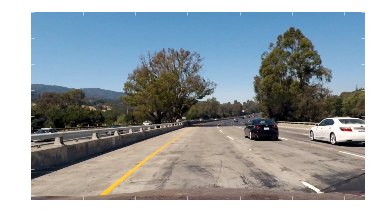

In [11]:
# Add interactive update method
def show_on_all(sobel_kernel=13, stx_min=20, stx_max=255,
                  sty_min=60, sty_max=255, mt_min=30, mt_max=100,
                  dt_min=-np.pi/2, dt_max=1.33, ct_min=150, ct_max=255):
    n_images = len(images)
    opts={'sobel_kernel': sobel_kernel, 'stx_min': stx_min,
          'stx_max': stx_max, 'sty_min': sty_min,'sty_max': sty_max,
          'mt_min': mt_min,'mt_max': mt_max, 'dt_min': dt_min,'dt_max': dt_max,
          'ct_min':ct_min, 'ct_max':ct_max}
    
    f, axes = plt.subplots(2, np.uint8(n_images/2), figsize=(24, 9))
    axes = axes.ravel()
    f.tight_layout()
    
    for a,img in enumerate(images):
        threshed = alf.combine_sobel_thresholds(img, opts)
        axes[a].imshow(threshed, cmap='gray')
        
def show_one(sobel_kernel=13, stx_min=20, stx_max=255,
                  sty_min=20, sty_max=255, mt_min=20, mt_max=100,
                  dt_min=-np.pi/2, dt_max=1.33, ct_min=100, ct_max=255):
    opts={'sobel_kernel': sobel_kernel, 'stx_min': stx_min,
          'stx_max': stx_max, 'sty_min': sty_min,'sty_max': sty_max,
          'mt_min': mt_min,'mt_max': mt_max, 'dt_min': dt_min,'dt_max': dt_max,
          'ct_min':ct_min, 'ct_max':ct_max}
    threshed = alf.combine_sobel_thresholds(images[2], opts)
    plt.imshow(threshed, cmap='gray')
    #print(threshed)
    
plt.imshow(images[2])

<function __main__.show_on_all>

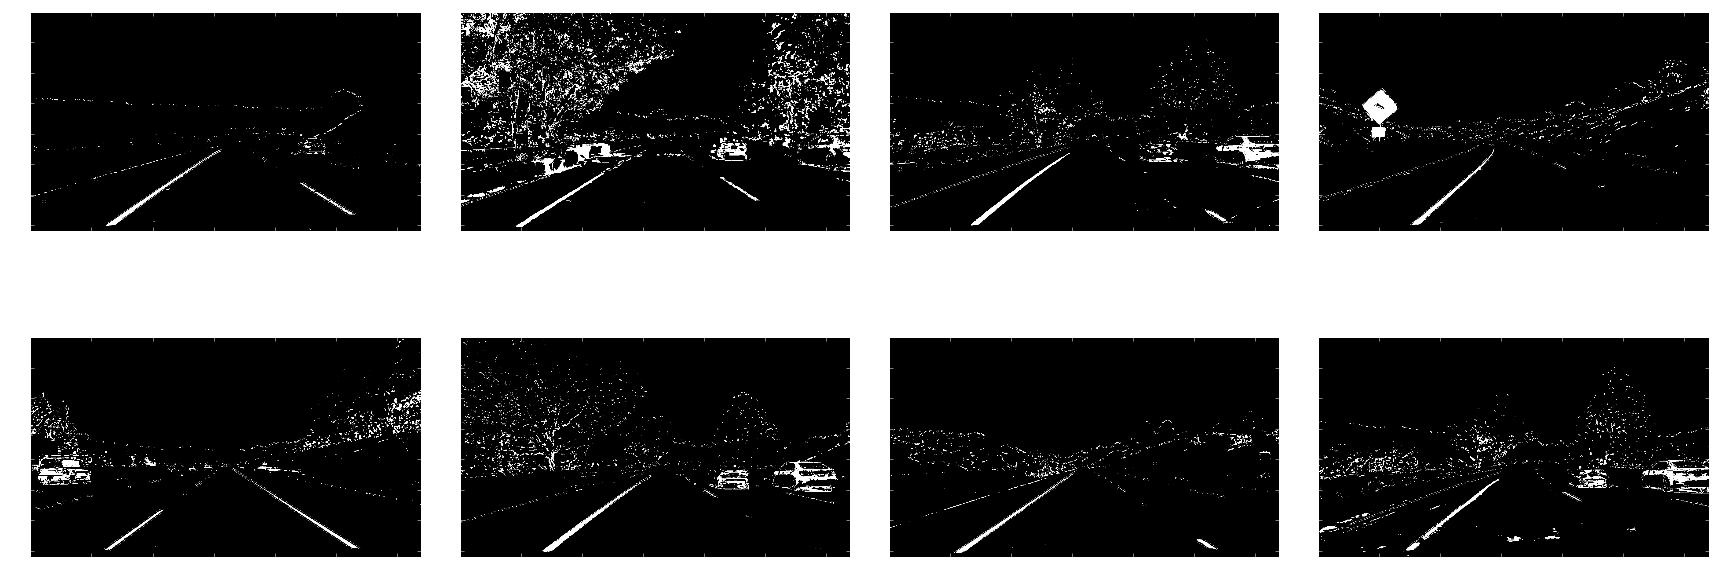

In [12]:
interact(show_on_all, sobel_kernel=(1, 31, 2), stx_min=(-1, 255), stx_max=(-1,255),
         sty_min=(-1,255), sty_max=(-1,255), mt_min=(-1,255), mt_max=(-1,255), 
         dt_min=(-np.pi/2,np.pi/2), dt_max=(-np.pi/2,np.pi/2),
         ct_min=(0,255), ct_max=(0,255))

In [ ]:
# Save M and Minv once
alf.calculate_perspective_matrices(images[0])

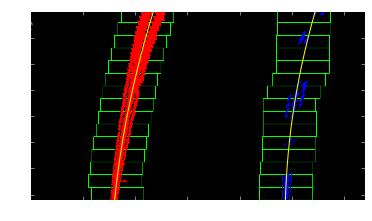

In [30]:
opts={'sobel_kernel': 13, 'stx_min': 20,
      'stx_max': 255, 'sty_min': 60,'sty_max': 255,
      'mt_min': 30,'mt_max': 100, 'dt_min': -np.pi/2,'dt_max': 1.33,
      'ct_min':150, 'ct_max':255}
# Save some thresholded images
M, Minv = alf.load_perspective_matrices()
threshed = alf.combine_sobel_thresholds(images[0], opts)
#mpimg.imsave('./output_images/threshed_example_road1.jpg', threshed, cmap='gray')
#plt.imshow(threshed, cmap='gray')
persp_trans = alf.transform_to_top_view(threshed, M)
#mpimg.imsave('./output_images/transformed_example_road1.jpg', persp_trans, cmap='gray')
left_fit, right_fit, fits = alf.fit_polynomial(persp_trans, plotit=True, nwindows=15)

In [5]:
opts={'sobel_kernel': 13, 'stx_min': 20,
      'stx_max': 255, 'sty_min': 20,'sty_max': 255,
      'mt_min': 20,'mt_max': 100, 'dt_min': -np.pi/2,'dt_max': 1.33,
      'ct_min':100, 'ct_max':255}
images_binary = []
images_binary_pt = []
M, Minv = alf.load_perspective_matrices()
for img in images:
    binary = alf.combine_sobel_thresholds(img, opts)
    images_binary.append(binary)
    perspective_transformed = alf.transform_to_top_view(binary, M)
    images_binary_pt.append(perspective_transformed)

In [ ]:
# Find source and destination for perspective transform
#%matplotlib qt
plt.imshow(images[7])
plt.show()

In [ ]:
%matplotlib inline
warped = alf.transform_to_top_view(images_binary[7])
plt.imshow(warped, cmap='gray')

In [ ]:
img = alf.transform_to_top_view(images_binary[0])
plt.subplot(1,2,1)
plt.plot(np.sum(img[img.shape[0]/2:,:], axis=0))
plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')

/home/marx/Documents/Programming/python/python3/udacity/carnd/CarND-Advanced-Lane-Lines/advanced_lane_finding.py:259: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0] / 2:, :], axis=0)


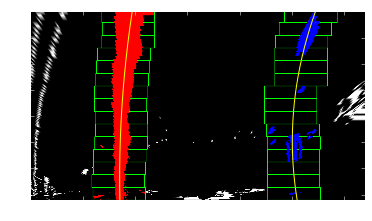

In [6]:
im_n = 7
img = images_binary_pt[im_n]
img_n = images[im_n]
left_fit, right_fit, fits = alf.fit_polynomial(img, plotit=True, nwindows=15)

In [14]:
img.shape

(720, 1280)

In [7]:
a,b, left, right = alf.calculate_curvature(img, left_fit,right_fit, fits)

In [19]:
((right[2]+left[2])/2) - (img.shape[1]*(3.7 / 700)/2)

0.52774765694238246

In [18]:
img.shape[1]*(3.7 / 700)

6.765714285714286

In [ ]:
a

In [20]:
import continous_lane_finding as clf

In [23]:
clf.process_video('./project_video.mp4',file_out='out.mp4')

[MoviePy] >>>> Building video out.mp4
[MoviePy] Writing video out.mp4


100%|█████████▉| 1260/1261 [13:46<00:00,  1.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out.mp4 



In [2]:
clf.process_video('./challenge_video.mp4', file_out='challenge_out.mp4')

[MoviePy] >>>> Building video challenge_out.mp4
[MoviePy] Writing video challenge_out.mp4


100%|██████████| 485/485 [04:33<00:00,  1.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_out.mp4 

